In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from scipy import interp
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt

from sklearn import feature_extraction

In [2]:
from importlib import reload
import FE
reload(FE)
from FE import FE

In [7]:
#xcols = ['admins', 'employees', 'usecompetitors','contractdays', 'callcycle', 'associateddeals','timescontacted','sessions', 'FF', 'strategic']

xcols = ['usecompetitors', 'callcycle','sessions', 'FF', 'strategic']

ycol = "churn"

df = pd.read_csv('data.csv')

X, y, xcolnames = FE(df,xcols,ycol, standardize=False)

In [6]:
df.head(5)

churn  pageviews  admins  employees  usecompetitors  contractdays  \
0      0          1       0       1000               0             0   
1      0          5       0      10000               0             0   
2      1          0       0          0               0             0   
3      0          0       0          0               1             0   
4      0          0       0        200               0             0   

           callcycle  associateddeals  timescontacted       origsource  \
0            Monthly                2               3   Direct Traffic   
1          Quarterly                0              13   Direct Traffic   
2          Quarterly                0               8          Unknown   
3  Every Other Month                1              10  Offline Sources   
4  Every Other Month                2              11  Offline Sources   

   sessions  FF   gauge        industry  strategic competingProducts  
0         0   1   Green    Construction          1               NaN  
1         2   0   Green  Consumer Goods          1               NaN  
2         0   0     Red    Oil & Energy          1               NaN  
3         0   0   Green    Oil & Energy          1           Enablon  
4         0   0  Yellow       Machinery          0               NaN

In [10]:
xcolnames

Index(['usecompetitors', 'sessions', 'FF', 'strategic',
       'callcycle_Every Other Month', 'callcycle_Half Year',
       'callcycle_Monthly', 'callcycle_None', 'callcycle_Quarterly',
       'callcycle_Yearly'],
      dtype='object')

In [18]:
Xdf = pd.DataFrame(X, columns = xcolnames)

In [19]:
Xdf

usecompetitors  sessions   FF  strategic  callcycle_Every Other Month  \
0               0.0       0.0  1.0        1.0                          0.0   
1               0.0       2.0  0.0        1.0                          0.0   
2               0.0       0.0  0.0        1.0                          0.0   
3               1.0       0.0  0.0        1.0                          1.0   
4               0.0       0.0  0.0        0.0                          1.0   
..              ...       ...  ...        ...                          ...   
237             0.0      21.0  1.0        1.0                          0.0   
238             0.0       0.0  0.0        0.0                          0.0   
239             0.0     158.0  1.0        1.0                          0.0   
240             0.0       2.0  1.0        0.0                          0.0   
241             1.0      89.0  1.0        1.0                          0.0   

     callcycle_Half Year  callcycle_Monthly  callcycle_None  \
0                    0.0                1.0             0.0   
1                    0.0                0.0             0.0   
2                    0.0                0.0             0.0   
3                    0.0                0.0             0.0   
4                    0.0                0.0             0.0   
..                   ...                ...             ...   
237                  0.0                0.0             0.0   
238                  0.0                0.0             1.0   
239                  0.0                0.0             0.0   
240                  0.0                0.0             1.0   
241                  0.0                1.0             0.0   

     callcycle_Quarterly  callcycle_Yearly  
0                    0.0               0.0  
1                    1.0               0.0  
2                    1.0               0.0  
3                    0.0               0.0  
4                    0.0               0.0  
..                   ...               ...  
237                  1.0               0.0  
238                  0.0               0.0  
239                  1.0               0.0  
240                  0.0               0.0  
241                  0.0               0.0  

[242 rows x 10 columns]

In [20]:
ydf = pd.DataFrame(y, columns = ['churn'])
ydf

churn
0        0
1        0
2        1
3        0
4        0
..     ...
237      0
238      1
239      0
240      1
241      0

[242 rows x 1 columns]

In [27]:
data_clean = pd.concat([ydf, Xdf], axis =1)
data_clean
data_clean.to_csv('data_clean.csv', index = False)

In [24]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X,y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [7]:
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Logistic Regression:           0.85


### Logistic Regression Deep Dive

In [27]:
# Hyper parameter tuning

#Grid Search
logreg = linear_model.LogisticRegression(class_weight='balanced', solver="liblinear")
param = {'C':[0.001,0.01, 0.5, 0.6, 0.8,1,9,10,11]}
clf = model_selection.GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=5)
clf.fit(X,y)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the

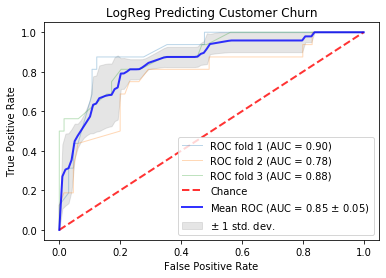

In [46]:
seed = 1234

# Model building and KFold
lr = linear_model.LogisticRegression(class_weight='balanced', penalty='none', max_iter=10000)
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=seed)

# initialization params
pred_test_full = y.copy()
cv_score =[]
i=1
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

for train_index,test_index in kf.split(X,y):
    xtr,xvl = X[train_index],X[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    #fit model
    lr.fit(xtr,ytr)

    #get prediction data
    pred_test = lr.predict_proba(xvl)[:,1]
    pred_test_full[yvl] = lr.predict_proba(xvl)[:,1]

    # ROC Curve Plotting
    viz = plot_roc_curve(lr, xvl, yvl,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    i+=1

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="LogReg Predicting Customer Churn")
ax.legend(loc="lower right")
plt.show()

### Variable Importance Metrics

In [44]:
logit = sm.Logit(y, X)

# fit the model
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.302607
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  242
Model:                          Logit   Df Residuals:                      232
Method:                           MLE   Df Model:                            9
Date:                Sun, 02 Feb 2020   Pseudo R-squ.:                  0.3925
Time:                        15:42:32   Log-Likelihood:                -73.231
converged:                       True   LL-Null:                       -120.54
Covariance Type:            nonrobust   LLR p-value:                 1.918e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7663      0.614      2.877      0.004       0.563       2.970
x2            -0.1357      0

In [50]:
xcolnames

Index(['usecompetitors', 'sessions', 'FF', 'strategic',
       'callcycle_Every Other Month', 'callcycle_Half Year',
       'callcycle_Monthly', 'callcycle_None', 'callcycle_Quarterly',
       'callcycle_Yearly'],
      dtype='object')

### Variable Importance through Coefficients

In [48]:
logreg_full = linear_model.LogisticRegression(class_weight='balanced', penalty='none').fit(X, y)
pred_full = logreg_full.predict_proba(X)[:,1]

prob = (np.exp(logreg_full.coef_) - 1)

pd.DataFrame(np.round(prob.T,2), index=xcolnames, columns=["% Change"]).sort_values(by="% Change", ascending=False)

% Change
callcycle_Quarterly              7.79
usecompetitors                   4.45
FF                               2.36
callcycle_None                   1.28
callcycle_Monthly                0.18
callcycle_Every Other Month      0.07
sessions                        -0.16
callcycle_Half Year             -0.76
callcycle_Yearly                -0.81
strategic                       -0.95

#### Variable Importance through RFE

In [49]:
from sklearn.feature_selection import RFE

selector = RFE(logreg_full, n_features_to_select=1)
selector.fit(X, y)

order = np.array(selector.ranking_)

pd.DataFrame(order.T, index=xcolnames, columns=["Rank"]).sort_values(by="Rank")

Rank
strategic                       1
callcycle_Half Year             2
callcycle_Yearly                3
usecompetitors                  4
callcycle_Quarterly             5
callcycle_None                  6
FF                              7
sessions                        8
callcycle_Monthly               9
callcycle_Every Other Month    10